In [1]:
from pandas import DataFrame, read_csv
alexnet_history: DataFrame = read_csv("./alexnet_training_log.csv")

In [2]:
import seaborn as sns

<AxesSubplot:>

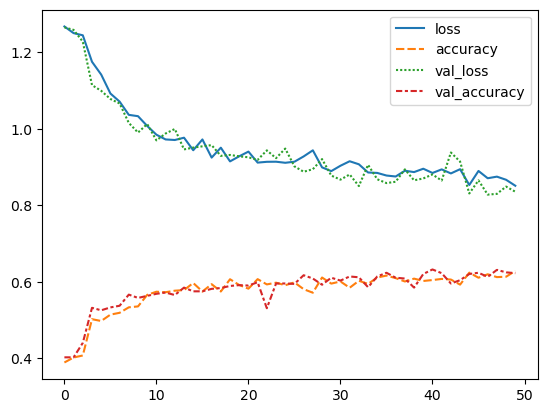

In [3]:
sns.lineplot(alexnet_history.drop(columns=["Unnamed: 0"]))

In [4]:
resnet18_history = read_csv("resnet18_training_log.csv")

<AxesSubplot:>

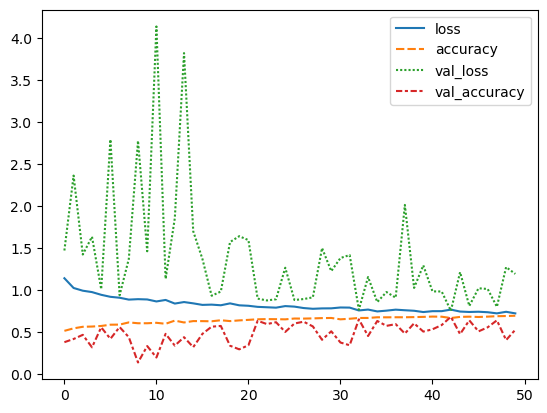

In [5]:
sns.lineplot(resnet18_history.drop(columns=["Unnamed: 0"]))

<AxesSubplot:>

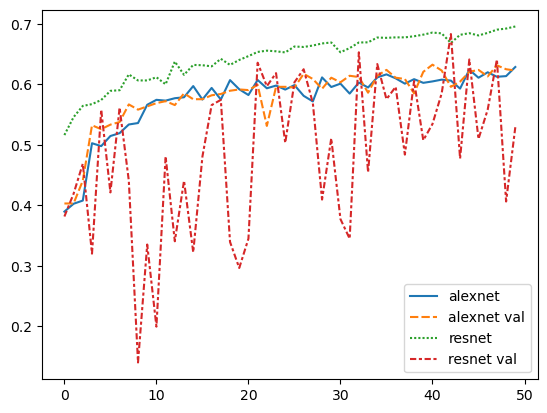

In [6]:
sns.lineplot({
    "alexnet": alexnet_history["accuracy"],
    "alexnet val": alexnet_history["val_accuracy"],
    "resnet": resnet18_history["accuracy"],
    "resnet val": resnet18_history["val_accuracy"],
})

<AxesSubplot:>

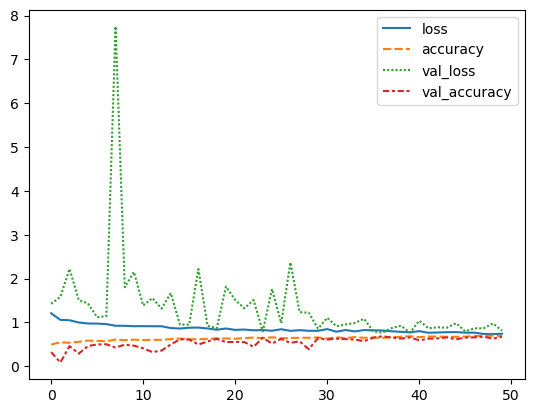

In [9]:
resnet34_history = read_csv("./resnet34_training_log.csv")
sns.lineplot(resnet34_history.drop(columns=["Unnamed: 0"]))

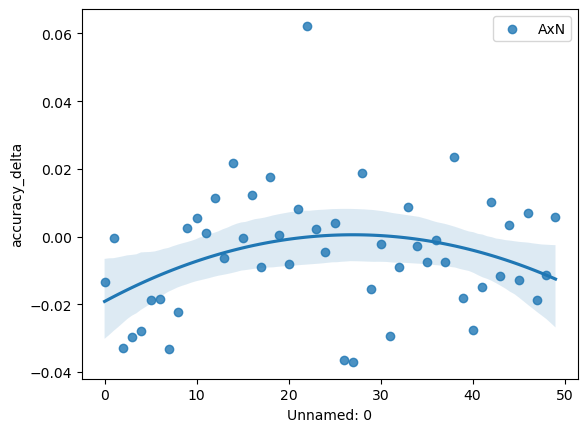

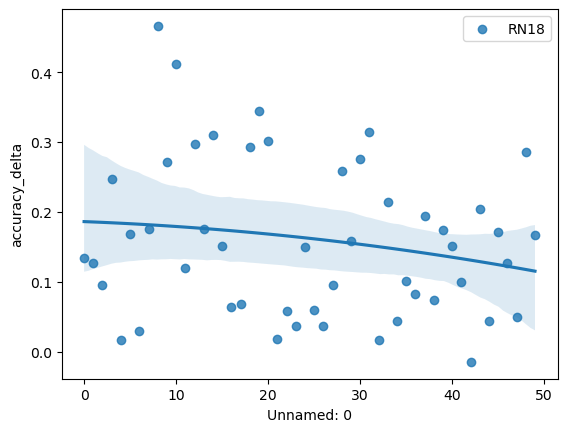

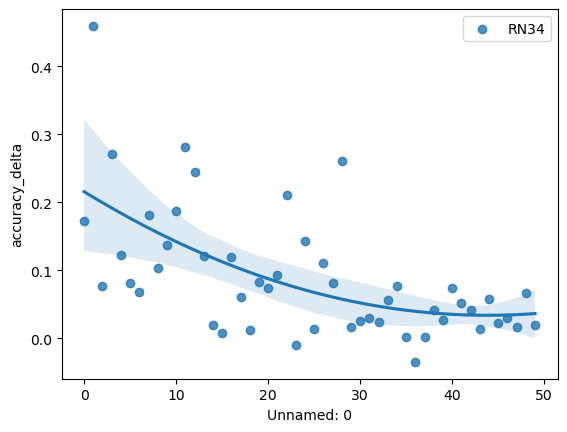

In [10]:
from scipy.interpolate import interp1d
from numpy import linspace
import matplotlib.pyplot as plt



histories = {
    "AxN": alexnet_history,
    "RN18": resnet18_history,
    "RN34": resnet34_history
}

for name, history in histories.items():
    history["accuracy_delta"] = history["accuracy"] - history["val_accuracy"]
    sns.regplot(
        data=history,
        x="Unnamed: 0",
        y="accuracy_delta",
        order=2,
        label=name
    )
    plt.legend()
    plt.show()